In [144]:
#JEBALI Ibtissem
#GUILBERT--ARRUGA Léo
#BELHADJ-CHAIDI Yacine
#M1 BIDABI

import pandas as pd #packages

chemin = r"C:\Users\leogu\OneDrive\Bureau\Etude\Master\Python\projet\donnees_python_etude.xlsx" #chemin
df = pd.read_excel(chemin) #import

df = df.drop(index=[0, 1]) #supp deux premieres lignes et les lignes 55-60
df = df.drop(index=range(55, 61))

df = df.drop(columns=['Niveau de l\'enseignement.1']) #nettoyer colonnes sans noms
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.columns = [
    'Zone', 
    'Annees_Primary', 
    'Age_Primary', 
    'Jours_Primary', 
    'Annees_Secondary_1', 
    'Age_Secondary_1', 
    'Jours_Secondary_1', 
    'Annees_Secondary_2', 
    'Age_Secondary_2', 
    'Jours_Secondary_2',] #renommer colonnes

df = df.reset_index(drop=True) #remettre index à 0 apres nettoyage
display(df) #afficher
df.shape #dimensions 53 lignes et 10 colonnes

,Zone,Annees_Primary,Age_Primary,Jours_Primary,Annees_Secondary_1,Age_Secondary_1,Jours_Secondary_1,Annees_Secondary_2,Age_Secondary_2,Jours_Secondary_2
0,Australie,7,5,200,4,12,200,0,M ..,M ..
1,Autriche,4,6,180,4,10,180,1,14,180
2,Belgique > Communauté flamande,6,6,176,2,12,178,4,14,178
3,Belgique > Communauté française,6,6,177,2,12,177,4,14,177
4,Canada,6,6,184.6166,3,12,184.6166,O ..,15,O ..
5,Chili,6,6,181.43388,2,12,180.18432,4,14,180.00153
6,Colombie,5,6,200,4,11,200,2,15,200
7,Costa Rica,6,6,200,3,12,200,2,15,200
8,Tchéquie,5,6,194,4,11,194,0,M ..,M ..
9,Danemark,7,6,200,3,13,200,0,M ..,M ..


(53, 10)

Moyenne d'âge de début pour l'enseignement primaire: 6.098484772727272
Moyenne du nombre de jours d'instruction pour l'enseignement primaire: 185.42169976744185


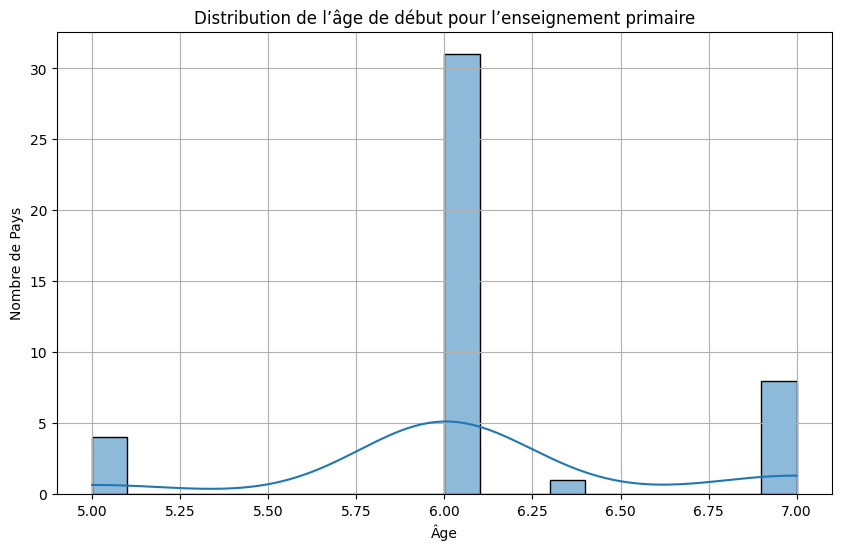

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns #packages

df = df[df['Zone'] != 'OCDE'] #supprimer ligne OCDE

df['Age_Primary'] = pd.to_numeric(df['Age_Primary'], #tout mettre en numerique
                                  errors='coerce') #remplacer valeur non convertible en numerique en NaN
df['Jours_Primary'] = pd.to_numeric(df['Jours_Primary'],
                                    errors='coerce')
mean_age_primary = df['Age_Primary'].mean() #calculer moyenne
mean_days_primary = df['Jours_Primary'].mean()
print(f"Moyenne d'âge de début pour l'enseignement primaire: {mean_age_primary}") #afficher
print(f"Moyenne du nombre de jours d'instruction pour l'enseignement primaire: {mean_days_primary}")
#faire graph
plt.figure(figsize=(10, 6)) #fenetre graph
sns.histplot(df['Age_Primary'], bins=20, #faire histo
             kde=True) #ajouter courbe
plt.title('Distribution de l’âge de début pour l’enseignement primaire') #titre
plt.xlabel('Âge') #noms axes
plt.ylabel('Nombre de Pays')
plt.grid(True) #afficher grille
plt.show() #afficher graph

In [123]:
continent_mapping = { #tout mettre en continent
    'Australie': 'Océanie',
    'Autriche': 'Europe',
    'Belgique > Communauté flamande': 'Europe',
    'Belgique > Communauté française': 'Europe',
    'Canada': 'Amérique du Nord',
    'Chili': 'Amérique du Sud',
    'Colombie': 'Amérique du Sud',
    'Costa Rica': 'Amérique Centrale',
    'Tchéquie': 'Europe',
    'Danemark': 'Europe',
    'Estonie': 'Europe',
    'Finlande': 'Europe',
    'France': 'Europe',
    'Allemagne': 'Europe',
    'Grèce': 'Europe',
    'Hongrie': 'Europe',
    'Islande': 'Europe',
    'Irlande': 'Europe',
    'Israël': 'Asie',
    'Italie': 'Europe',
    'Japan': 'Asie',
    'Corée': 'Asie',
    'Lettonie': 'Europe',
    'Lituanie': 'Europe',
    'Luxembourg': 'Europe',
    'Mexique': 'Amérique du Nord',
    'Pays-Bas': 'Europe',
    'Nouvelle-Zélande': 'Océanie',
    'Norvège': 'Europe',
    'Pologne': 'Europe',
    'Portugal': 'Europe',
    'République slovaque': 'Europe',
    'Slovénie': 'Europe',
    'Espagne': 'Europe',
    'Suède': 'Europe',
    'Suisse': 'Europe',
    'Türkiye': 'Asie',  
    'Royaume-Uni > England': 'Europe',
    'Royaume-Uni > Scotland': 'Europe',
    'États-Unis': 'Amérique du Nord',
    'Union européenne (25 pays)': 'Europe',
    'Non-OCDE économies > Argentine': 'Amérique du Sud',
    'Non-OCDE économies > Brésil': 'Amérique du Sud',
    'Non-OCDE économies > Bulgarie': 'Europe',
    'Non-OCDE économies > Chine (République populaire de)': 'Asie',
    'Non-OCDE économies > Croatie': 'Europe',
    'Non-OCDE économies > Inde': 'Asie',
    'Non-OCDE économies > Indonésie': 'Asie',
    'Non-OCDE économies > Pérou': 'Amérique du Sud',
    'Non-OCDE économies > Roumanie': 'Europe',
    'Non-OCDE économies > Arabie saoudite': 'Asie',
    'Non-OCDE économies > Afrique du Sud': 'Afrique',}
def get_continent(zone):
    return continent_mapping.get(zone) #fonction pour associe le bon pays a son continent
df['Continent'] = df['Zone'].apply(get_continent) #appliquer fonction 


Statistiques du nombre de jours d'instruction primaire par continent:


,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Afrique,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amérique Centrale,1.0,200.000000,NaN,200.00000,200.00000,200.0000,200.00000,200.0000
Amérique du Nord,2.0,182.308300,3.264429,180.00000,181.15415,182.3083,183.46245,184.6166
Amérique du Sud,3.0,193.811293,10.719154,181.43388,190.71694,200.0000,200.00000,200.0000
Asie,4.0,195.575000,13.083928,180.00000,187.50000,196.6500,204.72500,209.0000
Europe,31.0,182.251052,8.056062,169.16667,175.50000,180.0000,188.00000,200.0000
Océanie,2.0,197.500000,3.535534,195.00000,196.25000,197.5000,198.75000,200.0000


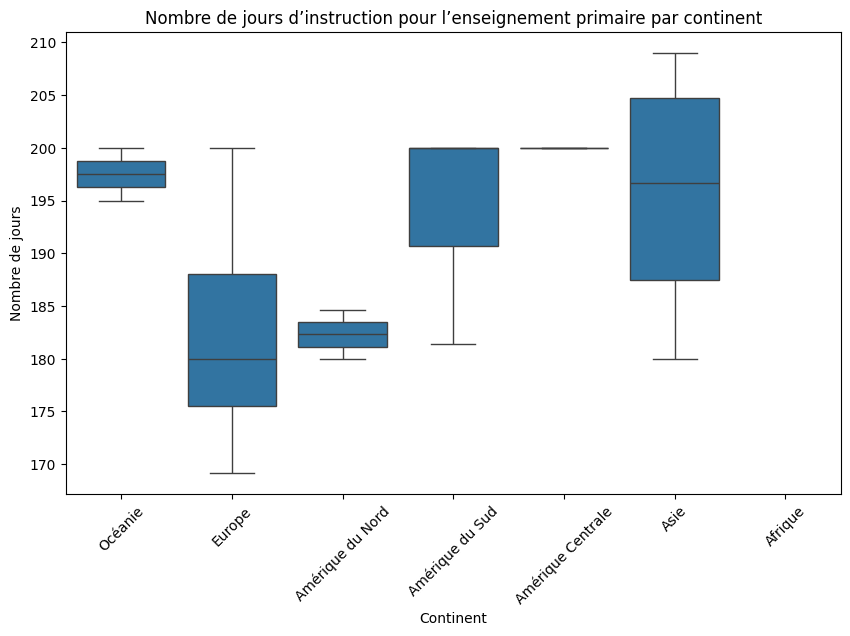

In [126]:
days_stats_by_continent = df.groupby('Continent')['Jours_Primary'].describe() #stats jour primaire par continent
print("\nStatistiques du nombre de jours d'instruction primaire par continent:")
display(days_stats_by_continent) #afficher
#faire graph
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', #boxplot
            y='Jours_Primary', data=df)
plt.title('Nombre de jours d’instruction pour l’enseignement primaire par continent')
plt.xticks(rotation=45) #mettre noms absicces sur le coté
plt.xlabel('Continent')
plt.ylabel('Nombre de jours')
plt.show()

In [129]:
# Filtrer pour ne garder que les données européennes
df_europe = df[df['Continent'] == 'Europe'] #creer dr pour europe
df_europe = df_europe[df_europe['Zone'] != 'Union européenne (25 pays)'] #supprimer ligne groupe UE
display(df_europe)
df_europe.shape #dimensions 31x11

,Zone,Annees_Primary,Age_Primary,Jours_Primary,Annees_Secondary_1,Age_Secondary_1,Jours_Secondary_1,Annees_Secondary_2,Age_Secondary_2,Jours_Secondary_2,Continent
1,Autriche,4,6.0,180.00000,4,10,180,1,14,180,Europe
2,Belgique > Communauté flamande,6,6.0,176.00000,2,12,178,4,14,178,Europe
3,Belgique > Communauté française,6,6.0,177.00000,2,12,177,4,14,177,Europe
8,Tchéquie,5,6.0,194.00000,4,11,194,0,M ..,M ..,Europe
9,Danemark,7,6.0,200.00000,3,13,200,0,M ..,M ..,Europe
10,Estonie,6,7.0,175.00000,3,13,175,0,M ..,M ..,Europe
11,Finlande,6,7.0,187.00000,3,13,187,3,16,187,Europe
12,France,5,6.0,180.00000,4,11,180,3,15,180,Europe
13,Allemagne,4,6.0,188.00000,5,10,188,0,M ..,M ..,Europe
14,Grèce,6,6.0,174.00000,3,12,164,0,M ..,M ..,Europe


(31, 11)

In [131]:
#Conversion des colonnes numériques en utilisant pd.to_numeric avec errors='coerce'
cols_numeriques = ['Annees_Primary', 'Age_Primary', 'Jours_Primary', 
                   'Annees_Secondary_1', 'Age_Secondary_1', 'Jours_Secondary_1', 
                   'Annees_Secondary_2', 'Age_Secondary_2', 'Jours_Secondary_2'] #toutes colonnes dans une variable
df_europe[cols_numeriques] = df_europe[cols_numeriques].apply(lambda x: pd.to_numeric(x, errors='coerce'))
#appliquer fonction pour mettre en numerique, si pas possible mettre NaN (comme sur le premier df)
df_europe.describe() #stats descriptives pour europe

,Annees_Primary,Age_Primary,Jours_Primary,Annees_Secondary_1,Age_Secondary_1,Jours_Secondary_1,Annees_Secondary_2,Age_Secondary_2,Jours_Secondary_2
count,31.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,17.000000,16.000000
mean,5.483871,6.193548,182.255556,3.387097,11.741935,181.025000,1.225806,14.764706,180.177083
std,1.028623,0.542792,8.193743,0.843699,0.998924,9.692275,1.407354,0.664211,9.861912
min,4.000000,5.000000,169.166670,2.000000,10.000000,163.666670,0.000000,14.000000,162.333330
25%,4.500000,6.000000,175.250000,3.000000,11.000000,175.000000,0.000000,14.000000,176.500000
50%,6.000000,6.000000,180.000000,3.000000,12.000000,180.000000,1.000000,15.000000,180.000000
75%,6.000000,6.500000,188.000000,4.000000,12.500000,188.000000,2.000000,15.000000,187.250000
max,7.000000,7.000000,200.000000,6.000000,13.000000,200.000000,4.000000,16.000000,200.000000


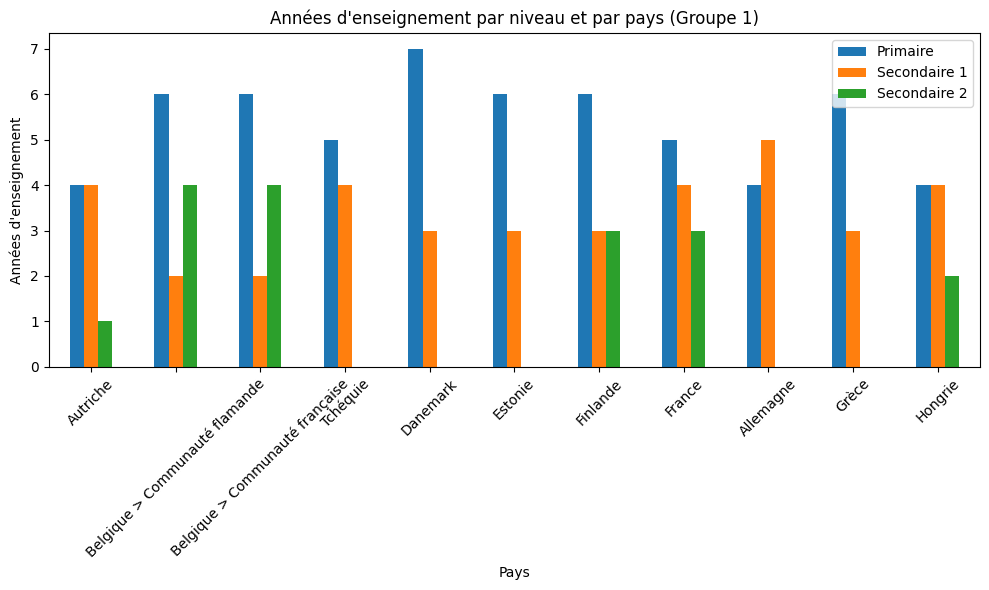

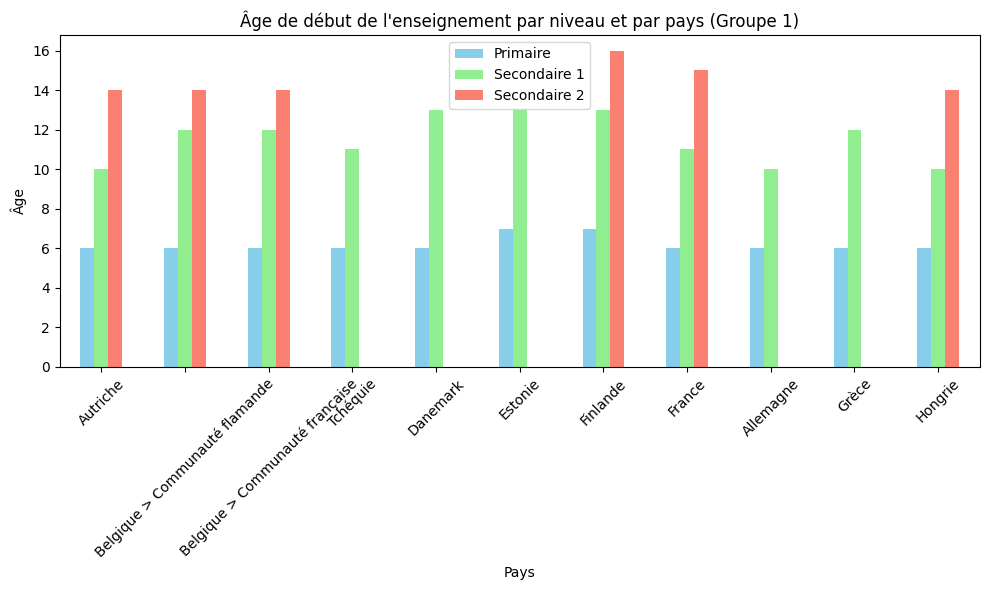

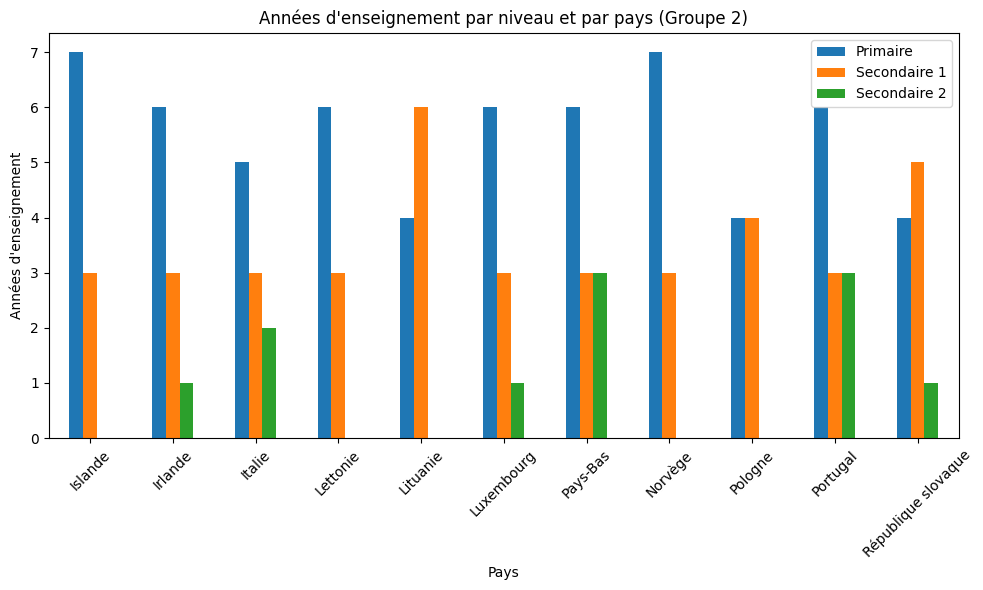

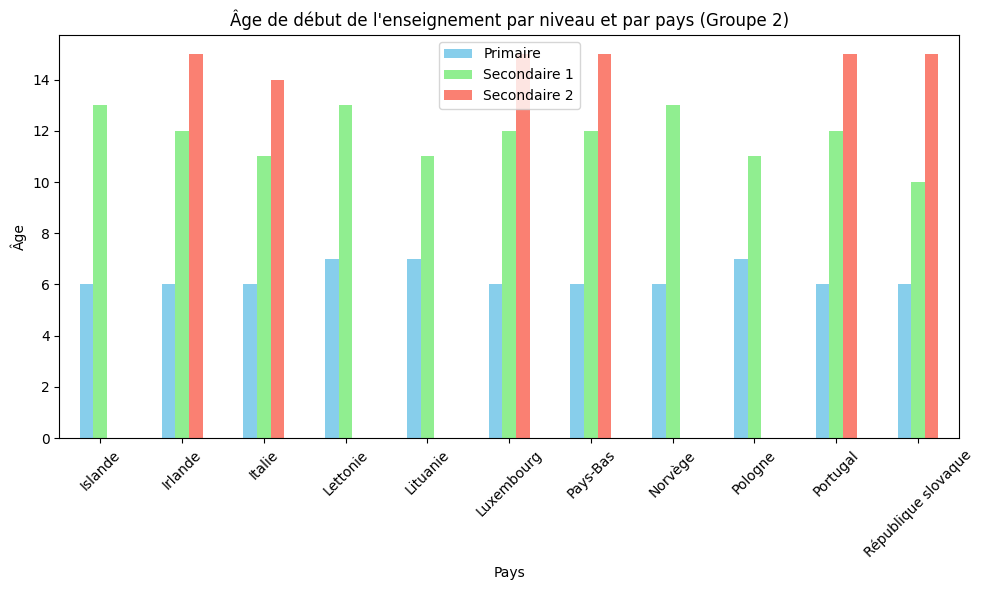

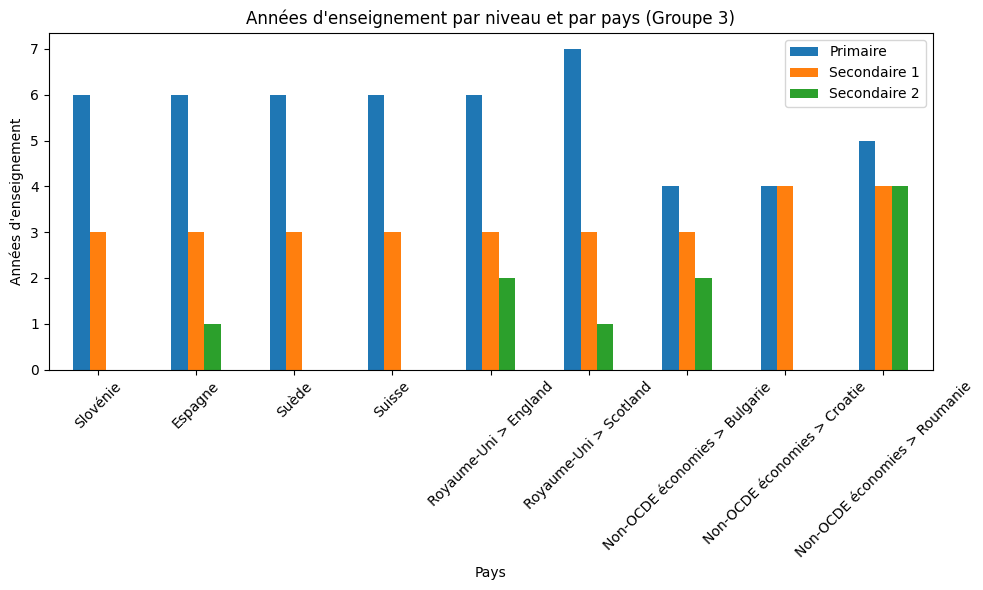

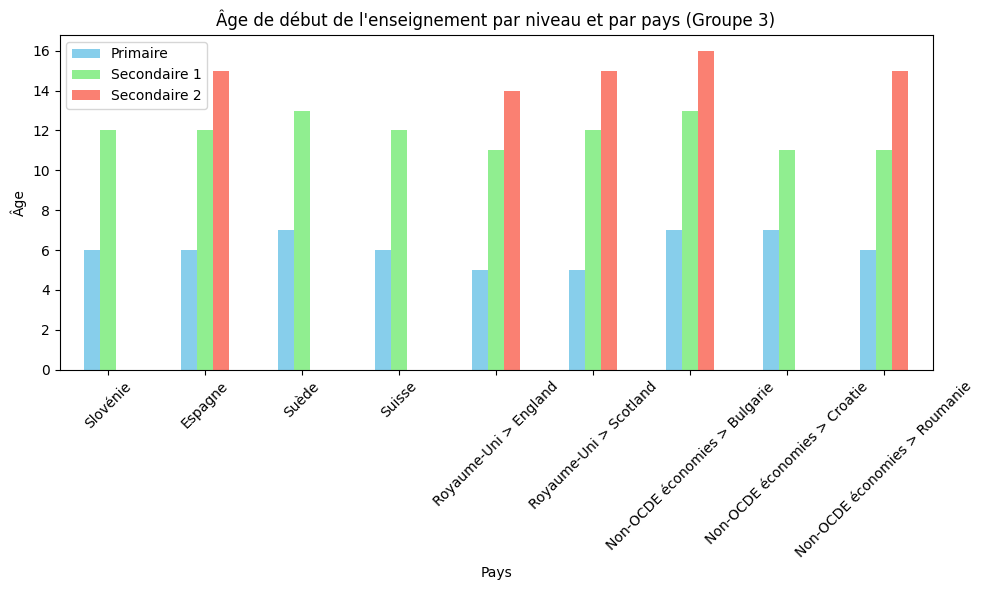

In [133]:
import matplotlib.pyplot as plt
import numpy as np #package

#créer les graphiques sous formes de boucle pour decouper car il ya trop de pays pour mettre sur un seul graph
#donc on en met 11 par graph car il ya 31 pays en europe dans nos données, donc 3 graph 

pays_par_graphique = 11 #nbr graph par fenetre
nombre_de_graphiques = len(df_europe) // pays_par_graphique + (1 if len(df_europe) % pays_par_graphique > 0 else 0)

# Création des graphiques
for i in range(nombre_de_graphiques): 
    debut = i * pays_par_graphique
    fin = debut + pays_par_graphique
    df_subset = df_europe.iloc[debut:fin]
    
    # Graphique pour les années d'enseignement
    df_subset.plot(x='Zone',
                   y=['Annees_Primary', 'Annees_Secondary_1', 'Annees_Secondary_2'], #variable pour les années enseignements
                   kind='bar', #histogramme
                   figsize=(10, 6))
    plt.title(f'Années d\'enseignement par niveau et par pays (Groupe {i+1})') #titre avec changement automatique pour numero de groupe 1 a 3
    plt.ylabel('Années d\'enseignement')
    plt.xlabel('Pays')
    plt.xticks(rotation=45)
    plt.legend(["Primaire", "Secondaire 1", "Secondaire 2"])
    plt.tight_layout()
    plt.show()
    
    df_subset.plot(x='Zone',
                   y=['Age_Primary', 'Age_Secondary_1', 'Age_Secondary_2'],
                   kind='bar',
                   figsize=(10, 6),
                   color=['skyblue', 'lightgreen', 'salmon']) 
    plt.title(f'Âge de début de l\'enseignement par niveau et par pays (Groupe {i+1})')
    plt.ylabel('Âge')
    plt.xlabel('Pays')
    plt.xticks(rotation=45)
    plt.legend(["Primaire", "Secondaire 1", "Secondaire 2"])
    plt.tight_layout()
    plt.show()



In [137]:
df_europe['Total_Annees_Ecole'] = df_europe['Annees_Primary'] + df_europe['Annees_Secondary_1'] + df_europe['Annees_Secondary_2']
#ajouter colonne au df europe avec la duree totale obligatoire d'etude
df_europe[['Zone', 'Total_Annees_Ecole']] 

,Zone,Total_Annees_Ecole
1,Autriche,9
2,Belgique > Communauté flamande,12
3,Belgique > Communauté française,12
8,Tchéquie,9
9,Danemark,10
10,Estonie,9
11,Finlande,12
12,France,12
13,Allemagne,9
14,Grèce,9


C:\Users\leogu\AppData\Local\Temp\ipykernel_5680\3364997421.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


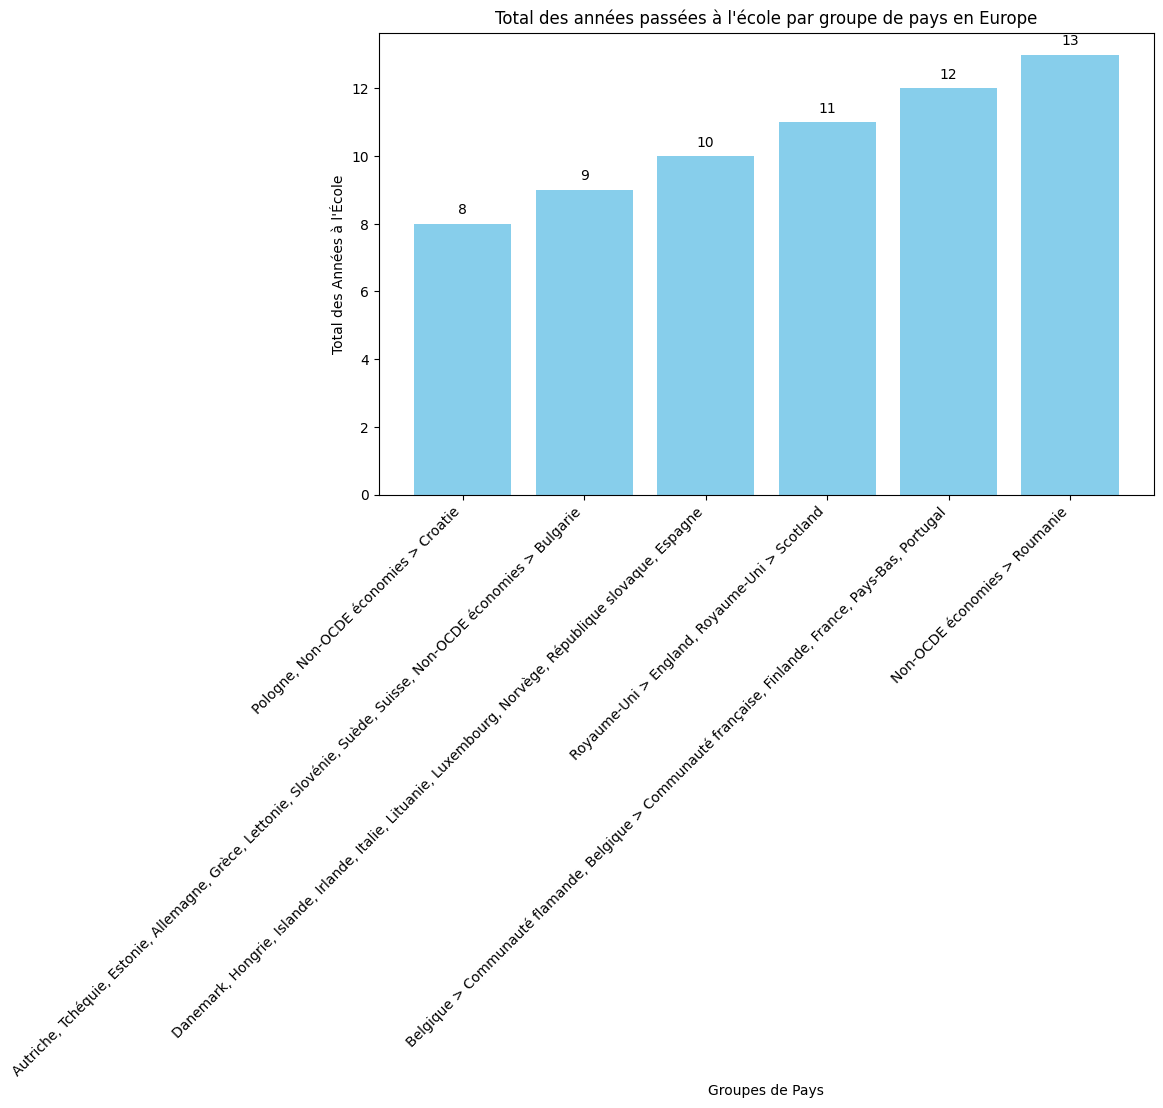

In [140]:
#grouper les pays avec la meme durée avec une fonction
grouped = df_europe.groupby('Total_Annees_Ecole')['Zone'].apply(lambda x: ', '.join(x)).reset_index(name='Zone')
#faire graph
plt.figure(figsize=(10, 6))
x_pos = range(len(grouped)) #position abscisse
plt.bar(x_pos, grouped['Total_Annees_Ecole'], color='skyblue') #hist
for i, v in enumerate(grouped['Total_Annees_Ecole']): #afficher noms au dessus des barres
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.xticks(x_pos, grouped['Zone'], rotation=45, ha='right') #mettre les groupes des pays
plt.title('Total des années passées à l\'école par groupe de pays en Europe')
plt.xlabel('Groupes de Pays')
plt.ylabel('Total des Années à l\'École')
plt.tight_layout()
plt.show()

In [141]:
idh_dict = {							#créer variable IDH #source : https://www.populationdata.net/palmares/idh/europe/

	'Autriche': 0.914,
	'Belgique > Communauté flamande': 0.919,
	'Belgique > Communauté française': 0.919,
	'Tchéquie': 0.889,
	'Danemark': 0.930,
	'Estonie': 0.882,
	'Finlande': 0.925,
	'France': 0.903,
	'Allemagne': 0.947,
	'Grèce': 0.872,
	'Hongrie': 0.845,
	'Islande': 0.938,
	'Irlande': 0.942,
	'Italie': 0.895,
	'Lettonie': 0.863,
	'Lituanie': 0.869,
	'Luxembourg': 0.916,
	'Pays-Bas': 0.944,
	'Norvège': 0.954,
	'Pologne': 0.872,
	'Portugal': 0.850,
	'République slovaque': 0.857,
	'Slovénie': 0.918,
	'Espagne': 0.911,
	'Suède': 0.945,
	'Suisse': 0.946,
	'Royaume-Uni > England': 0.929,
	'Royaume-Uni > Scotland': 0.929
}
df_europe['IDH'] = df_europe['Zone'].map(idh_dict) #inclure IDH dans df europe

In [143]:
df_idh = df_europe.dropna(subset=['IDH']) #nouveau df avec que le pays avec un IDH
df_idh_num = df_idh.select_dtypes(include=['float64', 'int64']) #prendre que les valeurs numeriques
correlations = df_idh_num.corr()['IDH'].drop('IDH') #enlever IDH pour pas le mettre avec lui-même #calcul correlation entre les colonnes
correlation_moyenne = correlations.mean() #faire la moyenne de correlation totale
print("La corrélation moyenne entre l'IDH et les variables éducatives est :", correlation_moyenne) #afficher

La corrélation moyenne entre l'IDH et les variables éducatives est : 0.09776733186201926
